In [1]:
import math
import time
import random
from sklearn.model_selection import train_test_split

In [12]:
def time_to_sin(current_time):
    T = 12
    sin_measure = math.sin((2 * math.pi / T) * current_time)
    return sin_measure

In [37]:
measures = []
time_data = []
for i in range(0, 200):
    if random.random() < 0.1:
        time.sleep(1)
        continue
    current_time = math.floor(time.time())
    current_price = time_to_sin(current_time)
    measures.append(current_price)
    time_data.append(current_time)
    time_of_next_full_minute = math.ceil(time.time())
    time.sleep(time_of_next_full_minute - time.time())

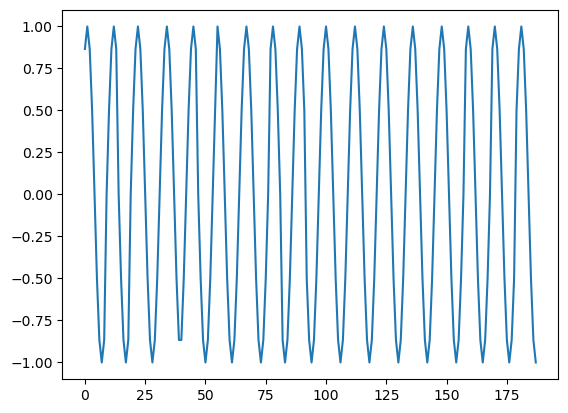

In [44]:
import matplotlib.pyplot as plt

plt.plot(measures)
plt.show()

In [45]:


# time and price
df = pd.DataFrame({'time': time_data, 'price': measures})
#timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(current_time))
# convert time to timestamp with format '%Y-%m-%d %H:%M:%S'
df['time'] = pd.to_datetime(df['time'], unit='s')

df.to_csv('test.csv', index=False)

In [78]:
df.shape[0]

188

In [3]:
import pandas as pd
df = pd.read_csv('test.csv')

In [14]:
df['price'].values[-5:].shape

(5,)

In [9]:
(df.tail())

,time,price
183,2024-05-21 16:12:05,5.000001e-01
184,2024-05-21 16:12:06,1.184396e-07
185,2024-05-21 16:12:07,-4.999999e-01
186,2024-05-21 16:12:08,-8.660254e-01
187,2024-05-21 16:12:09,-1.000000e+00


In [10]:
df.values[-1][1]

-0.9999999999999972

In [48]:
df.describe()

,price
count,1.880000e+02
mean,2.340041e-09
std,7.202198e-01
min,-1.000000e+00
25%,-8.660253e-01
50%,-1.975750e-11
75%,8.660253e-01
max,1.000000e+00


In [83]:
# fill in the missing values
df['time'] = pd.to_datetime(df['time'])
# check if most recent value is missing
check_current_time = math.floor(time.time())
datetime_current_time = pd.to_datetime(check_current_time, unit='s')
if df['time'].max() < datetime_current_time:
    # use concat
    df = pd.concat([df, pd.DataFrame({'time': [datetime_current_time], 'price': [None]})])
df.set_index('time', inplace=True)
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='S')
df = df.reindex(full_index)
df['price'] = df['price'].ffill()

In [84]:
# take the last 5 values to predict the next value
def create_dataset(dataframe):
    X = []
    y = []

    for i in range(5, len(dataframe)):
        X.append(dataframe['price'].values[i - 5:i])
        y.append(dataframe['price'].values[i])
    return X, y


X_train, y_train = create_dataset(df)

In [85]:
lastest_values = df['price'].values[-5:]

In [86]:
# train dt
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [87]:
# predict the next value
result = dt.predict([lastest_values])
result[0]

-0.9999999999999998

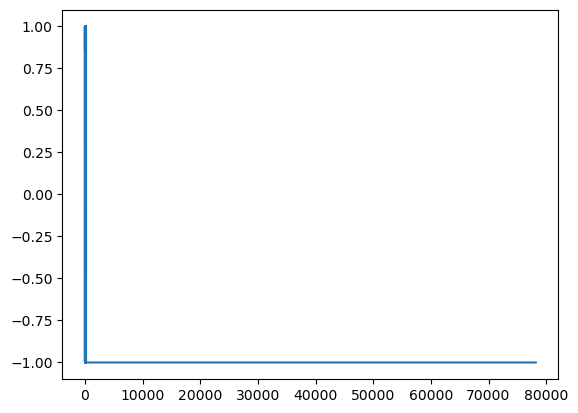

In [88]:
# plot
plt.plot(df['price'].values)
plt.show()